En este notebook realizaremos un problema de regresión donde calcularemos el valor de la variable ``trueE`` ya que este valor no se conoce antes de realizar el experimento. Por tanto, realizaremos una regresión para calcularlo y junto al notebook de la clasificación binaria podremos decir lo siguiente:

1- Predeciremos entre kaon y pion

2- Calcularemos el valor de la variable ``trueE``

3- Así podremos decir: 'Esto es un kaon/pion y lo hace con la siguiente energía'

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Cambiar el directorio de trabajo
ruta_nueva = '/home/rml/tfg/codigos' # Reemplaza 'TuUsuario' con tu nombre de usuario de Windows
os.chdir(ruta_nueva)

# Mostrar el directorio actual para confirmar el cambio
directorio_actual = os.getcwd()
print("Directorio actual:", directorio_actual)

Directorio actual: /home/rml/tfg/codigos


In [3]:
# Leemos los datos de train
path_actual = os.getcwd()
subdirectorio = 'datas'
file_train = 'df_train.csv'
path_train = os.path.join(path_actual, subdirectorio, file_train)
df_train = pd.read_csv(path_train, index_col=None)

In [4]:
# Leemos los datos de validacion
file_valid = 'df_valid.csv'
path_valid = os.path.join(path_actual,subdirectorio, file_valid)
df_valid = pd.read_csv(path_valid, index_col=None)

In [ ]:
df_train

,eventID,PDGcode,trueE,hitX,hitY,hitZ,hitTime,hitInteg
0,1,211,0.381965,13.5922,2.85275,-18.062,1872.38,1655.0600
1,1,211,0.381965,13.8270,2.79629,-17.893,1878.77,340.1960
2,1,211,0.381965,13.6746,2.74496,-17.677,1876.82,4047.6200
3,1,211,0.381965,13.5436,2.71796,-17.580,1878.30,1234.5500
4,1,211,0.381965,13.3256,2.72527,-17.542,1868.97,1394.2800
...,...,...,...,...,...,...,...,...
11612552,19999,321,0.511779,-26.7600,9.41895,45.739,1362.47,1825.6700
11612553,19999,321,0.511779,-26.8500,9.43314,45.757,1358.16,1862.7900
11612554,19999,321,0.511779,-26.8780,9.51059,46.057,1360.96,1586.2400
11612555,19999,321,0.511779,-26.9210,9.52140,46.063,1357.25,388.8380


In [ ]:
df_valid

,eventID,PDGcode,trueE,hitX,hitY,hitZ,hitTime,hitInteg
0,0,211,0.258707,-0.0020,-0.173207,0.2,1704.94,318.992
1,0,211,0.258707,0.0000,0.000000,0.5,1704.96,346.856
2,0,211,0.258707,0.0024,0.000000,0.7,1704.99,592.421
3,0,211,0.258707,0.0067,-0.346409,0.7,1698.51,1070.020
4,0,211,0.258707,0.0036,-0.519616,0.8,1698.47,889.101
...,...,...,...,...,...,...,...,...
3267899,19997,321,0.500785,1.9472,-12.124400,4.7,1726.72,357.400
3267900,19997,321,0.500785,1.9682,-12.817200,4.7,1723.61,338.582
3267901,19997,321,0.500785,2.0054,-12.470800,4.7,1727.47,333.317
3267902,19997,321,0.500785,1.6111,-13.683200,4.8,1719.04,368.375


## 0.- Tipos de modelos para el entrenamiento

*   **Regresión Lineal**: Modelo básico que intenta predecir una variable objetivo mediante una combinación lineal de las variables independientes
*   **Regresion Ridge**: Extiende la regresión lineal añadiendo una penalización L2 (la suma de los cuadrados de los coeficientes) a la función de perdida
*   **Regresión Lasso**: Similar a Ridge, pero añade una penalización L1 (la suma de los valores absolutos de los coeficientes),  lo que resulta en modelos con menos coeficientes no cero.
*   **Elastic Net**: Combina las penalizaciones de Ridge y Lasso, útil cuando hay múltiples características que están correlacionadas.
*   **Arboles de decisión para Regresión**: Utiliza un modelo de árbol de decisión para capturar relaciones no lineales en los datos
*   **Random Forest para Regresión**: Un ensamble de árboles de decisión, típicamente más robusto y preciso que un solo árbol.
*   **Gradient Boosting para Regresión**: Construye un modelo aditivo de manera progresiva y es efectivo para modelos complejos.
*   **SVR**: Extensión de las máquinas de soporte vectorial para regresión, intenta ajustar el error dentro de un umbral determinado
*   **K-Nearest Neighbors Regressor**: Predice el valor de la variable dependiente usando el promedio o la mediana de los k vecinos más cercanos
*   **Regresión Bayesiana Ridge**: Variante bayesiana de la regresión Ridge, proporciona una estimación probabilística de los parámetros del modelo
*   **Regresión de Vectores de Soporte Lineal**: Una versión más rápida de SVR para grandes conjuntos de datos con una relación lineal
*   **Stochastic Gradient Descent for Regression**: Utiliza el descenso de gradiente estocástico para encontrar los coeficientes, útil para cojuntos de datos grandes

## 1.- Entrenamiento de distintos modelos para la regresión

### 1.1.- Entrenamiento con el desconocimiento del kaon o pion

Aqui le pasaremos al modelo todos los datos que le pasabamos al problema de la clasificación binaria y el modelo no conocerá si es un kaon o un pion

In [ ]:
def filtrado_datos_energia(df, N):
    kaones = []
    labels = []
    valores_trueE = []  # Usamos un conjunto para almacenar valores únicos de trueE

    df_sorted = df.sort_values(by=['eventID', 'hitTime'], ascending=[True, False])

    for eventID, grupo in df_sorted.groupby('eventID'):
        pdgCodes = grupo['PDGcode'].unique()

        for pdgCode in pdgCodes:
            grupo_filtrado = grupo[grupo['PDGcode'] == pdgCode]
            grupo_ordenado = grupo_filtrado.head(N)

            # Obtener el valor de 'trueE' para el evento actual
            trueE_value = grupo_filtrado['trueE'].iloc[0]

            # Almacenar el valor de trueE en el conjunto
            valores_trueE.append(trueE_value)

            # Inicializar arrays para el padding
            hitX_padded = np.zeros(N)
            hitY_padded = np.zeros(N)
            hitZ_padded = np.zeros(N)
            hitInteg_padded = np.zeros(N)

            # Separar y aplicar padding a los valores de hitX, hitY, hitZ, hitInteg
            hitX_padded[:len(grupo_ordenado['hitX'])] = grupo_ordenado['hitX']
            hitY_padded[:len(grupo_ordenado['hitY'])] = grupo_ordenado['hitY']
            hitZ_padded[:len(grupo_ordenado['hitZ'])] = grupo_ordenado['hitZ']
            hitInteg_padded[:len(grupo_ordenado['hitInteg'])] = grupo_ordenado['hitInteg']

            # Concatenar los valores ya con el padding aplicado, añadiendo 'trueE' al principio
            hit_values_reorganized = np.concatenate([[trueE_value], hitX_padded, hitY_padded, hitZ_padded, hitInteg_padded])

            kaones.append(hit_values_reorganized)

            # Modificar las etiquetas de 211 a 0 y de 321 a 1
            if pdgCode == 211:
                labels.append(0)
            elif pdgCode == 321:
                labels.append(1)

    return np.array(kaones), np.array(labels), np.array(list(valores_trueE))

def filtrado_datos(df, N):
    kaones = []
    labels = []

    df_sorted = df.sort_values(by=['eventID', 'hitTime'], ascending=[True, False])

    for eventID, grupo in df_sorted.groupby('eventID'):
        pdgCodes = grupo['PDGcode'].unique()

        for pdgCode in pdgCodes:
            grupo_filtrado = grupo[grupo['PDGcode'] == pdgCode]
            grupo_ordenado = grupo_filtrado.head(N)

            # Inicializar arrays para el padding
            hitX_padded = np.zeros(N)
            hitY_padded = np.zeros(N)
            hitZ_padded = np.zeros(N)
            hitInteg_padded = np.zeros(N)

            # Separar y aplicar padding a los valores de hitX, hitY, hitZ, hitInteg
            hitX_padded[:len(grupo_ordenado['hitX'])] = grupo_ordenado['hitX']
            hitY_padded[:len(grupo_ordenado['hitY'])] = grupo_ordenado['hitY']
            hitZ_padded[:len(grupo_ordenado['hitZ'])] = grupo_ordenado['hitZ']
            hitInteg_padded[:len(grupo_ordenado['hitInteg'])] = grupo_ordenado['hitInteg']

            # Concatenar los valores ya con el padding aplicado
            hit_values_reorganized = np.concatenate([hitX_padded, hitY_padded, hitZ_padded, hitInteg_padded])

            kaones.append(hit_values_reorganized)

            # Modificar las etiquetas de 211 a 0 y de 321 a 1
            if pdgCode == 211:
                labels.append(0)
            elif pdgCode == 321:
                labels.append(1)

    return np.array(kaones), np.array(labels)

In [8]:
N=760
X_train, etiqueta_particula_train, trueE_train = filtrado_datos_energia(df_train, N)
X_train = X_train[:, 1:]

In [9]:
X_valid, etiqueta_particula_valid, trueE_valid = filtrado_datos_energia(df_valid, N)
X_valid = X_valid[:, 1:]


#### funcion para calcular los errores

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def scores_errors(etiquetas_reales, etiquetas_predecidas):
    mse = mean_squared_error(etiquetas_reales, etiquetas_predecidas)
    mae = mean_absolute_error(etiquetas_reales, etiquetas_predecidas)
    r2 = r2_score(etiquetas_reales, etiquetas_predecidas)

    rango = max(etiquetas_reales) - min(etiquetas_reales)

    mse_normalizado = mse / rango
    mae_normalizado = mae / rango

    return mse, mae, r2, mse_normalizado, mae_normalizado


#### Encontrar los mejores parámetros

In [ ]:
import optuna
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Define la función objetivo para la optimización de Optuna
def objective_RL(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    copy_X = trial.suggest_categorical('copy_X', [True, False])
    positive = trial.suggest_categorical('positive', [True, False])

    model = LinearRegression(
        fit_intercept=fit_intercept,
        copy_X=copy_X,
        positive=positive
    )
    
    # Evaluar el modelo utilizando validación cruzada
    score = cross_val_score(model, X_train, trueE_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective_RL, n_trials=10)

# Imprimir los mejores hiperparámetros encontrados
print(study.best_params)


[I 2024-05-21 11:42:38,271] A new study created in memory with name: no-name-09fba32f-5d89-40cf-ae8a-633fcd3086fd
[I 2024-05-21 11:51:39,413] Trial 0 finished with value: -0.01132638846671207 and parameters: {'fit_intercept': False, 'copy_X': False, 'positive': True}. Best is trial 0 with value: -0.01132638846671207.
[I 2024-05-21 12:00:25,367] Trial 1 finished with value: -0.009485345062639799 and parameters: {'fit_intercept': True, 'copy_X': True, 'positive': True}. Best is trial 1 with value: -0.009485345062639799.
[I 2024-05-21 12:01:34,473] Trial 2 finished with value: -0.013638357445348009 and parameters: {'fit_intercept': False, 'copy_X': True, 'positive': False}. Best is trial 1 with value: -0.009485345062639799.
[I 2024-05-21 12:11:33,996] Trial 3 finished with value: -0.009485345062639799 and parameters: {'fit_intercept': True, 'copy_X': True, 'positive': True}. Best is trial 1 with value: -0.009485345062639799.
[I 2024-05-21 12:12:41,757] Trial 4 finished with value: -0.0117

{'fit_intercept': True, 'copy_X': True, 'positive': True}


In [13]:
from sklearn.linear_model import Ridge


def objective_Ridge(trial):
    alpha = trial.suggest_categorical('alpha', [0, 0.5, 1.0, 1.5])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    copy_X = trial.suggest_categorical('copy_X', [True, False])
    solver = trial.suggest_categorical('solver', ['auto', 'sag', 'saga', 'lsqr'])
    positive = trial.suggest_categorical('positive', [True, False])
    random_state = 42  # Este parámetro se puede fijar ya que no varía en las búsquedas

    model = Ridge(
        alpha=alpha,
        fit_intercept=fit_intercept,
        copy_X=copy_X,
        solver=solver,
        positive=positive,
        random_state=random_state
    )
    
    # Evaluar el modelo utilizando validación cruzada
    score = cross_val_score(model, X_train, trueE_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective_Ridge, n_trials=10)

# Imprimir los mejores hiperparámetros encontrados
print(study.best_params)



[I 2024-05-21 12:36:37,012] A new study created in memory with name: no-name-054167cf-250c-4c4b-bb32-1a890e577626
[I 2024-05-21 12:36:51,457] Trial 0 finished with value: -0.013638041421569682 and parameters: {'alpha': 0.5, 'fit_intercept': False, 'copy_X': True, 'solver': 'auto', 'positive': False}. Best is trial 0 with value: -0.013638041421569682.
C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruben.morillas\AppData\Local\anacon

{'alpha': 1.5, 'fit_intercept': True, 'copy_X': False, 'solver': 'sag', 'positive': False}


In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import optuna

def objective_Lasso(trial):
    alpha = trial.suggest_categorical('alpha', [0, 0.5, 1.0, 1.5])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_categorical('max_iter', [500, 750, 1000, 1500])
    warm_start = trial.suggest_categorical('warm_start', [True, False])
    positive = trial.suggest_categorical('positive', [True, False])
    selection = trial.suggest_categorical('selection', ['cyclic', 'random'])

    # Verifica si el solver seleccionado es compatible con positive=True
    if positive and selection == 'random':
        selection = 'cyclic'  # Cambia a un solver compatible

    model = Lasso(
        alpha=alpha,
        fit_intercept=fit_intercept,
        max_iter=max_iter,
        warm_start=warm_start,
        positive=positive,
        random_state=42,
        selection=selection
    )

    score = cross_val_score(model, X_train, trueE_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective_Lasso, n_trials=10)

print(study.best_params)


[I 2024-05-21 21:38:54,055] A new study created in memory with name: no-name-f0272f55-ab58-4411-b579-56e6714a955a
[I 2024-05-21 21:39:08,356] Trial 0 finished with value: -0.01175971435172614 and parameters: {'alpha': 1.0, 'fit_intercept': False, 'max_iter': 750, 'warm_start': True, 'positive': False, 'selection': 'random'}. Best is trial 0 with value: -0.01175971435172614.
[I 2024-05-21 21:39:52,058] Trial 1 finished with value: -0.011751162670654665 and parameters: {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'warm_start': False, 'positive': False, 'selection': 'cyclic'}. Best is trial 0 with value: -0.01175971435172614.
[I 2024-05-21 21:40:05,271] Trial 2 finished with value: -0.009769243195048884 and parameters: {'alpha': 1.5, 'fit_intercept': True, 'max_iter': 500, 'warm_start': False, 'positive': False, 'selection': 'random'}. Best is trial 0 with value: -0.01175971435172614.
[I 2024-05-21 21:40:21,267] Trial 3 finished with value: -0.01175971435172614 and parameters:

{'alpha': 1.5, 'fit_intercept': False, 'max_iter': 1500, 'warm_start': True, 'positive': False, 'selection': 'cyclic'}


In [16]:
from sklearn.linear_model import ElasticNet

def objetive_EN(trial):
    alpha = trial.suggest_categorical('alpha', [0,0.5,1.0,1.5])
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_categorical('max_iter', [500,750,1000,1500])
    warm_start = trial.suggest_categorical('warm_start', [True, False])
    random_state = 42
    selection = trial.suggest_categorical('selection', ['cyclic', 'random'])

    model = ElasticNet(
        alpha=alpha,
        l1_ratio=l1_ratio,
        fit_intercept=fit_intercept,
        max_iter=max_iter,
        warm_start=warm_start,
        random_state=random_state,
        selection=selection
    )

    score = cross_val_score(model, X_train, trueE_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objetive_EN, n_trials=10)

print(study.best_params)

[I 2024-05-21 21:49:41,704] A new study created in memory with name: no-name-1038e98c-382d-454f-a87a-6efd5da5cbf6
[I 2024-05-21 21:50:26,610] Trial 0 finished with value: -0.011759788507175836 and parameters: {'alpha': 1.0, 'fit_intercept': False, 'max_iter': 500, 'warm_start': True, 'positive': True, 'selection': 'cyclic'}. Best is trial 0 with value: -0.011759788507175836.
[I 2024-05-21 21:50:38,580] Trial 1 finished with value: -0.009727998265130511 and parameters: {'alpha': 1.0, 'fit_intercept': True, 'max_iter': 1000, 'warm_start': False, 'positive': False, 'selection': 'random'}. Best is trial 1 with value: -0.009727998265130511.
[I 2024-05-21 21:50:58,974] Trial 2 finished with value: -0.009706790065302517 and parameters: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 500, 'warm_start': False, 'positive': False, 'selection': 'cyclic'}. Best is trial 2 with value: -0.009706790065302517.
[I 2024-05-21 21:51:43,665] Trial 3 finished with value: -0.011777118514574574 and paramete

{'alpha': 0.5, 'fit_intercept': True, 'max_iter': 500, 'warm_start': False, 'positive': False, 'selection': 'cyclic'}


In [15]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Definir los hiperparámetros a optimizar
    n_estimators = trial.suggest_categorical('n_estimators', [20,40,50,60])
    max_depth = trial.suggest_categorical('max_depth', [18,20,22,26])
    min_samples_split = trial.suggest_categorical('min_samples_split', [2,4,6, 10])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2,5,8,10])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
    # Crear el modelo RandomForestRegressor con los hiperparámetros sugeridos
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # Evaluar el modelo usando validación cruzada
    score = cross_val_score(model, X_train, trueE_train, cv=5, scoring='neg_mean_squared_error').mean()
    
    return score

# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Imprimir los mejores parámetros encontrados
print("Best parameters: ", study.best_params)

[I 2024-05-24 09:26:42,119] A new study created in memory with name: no-name-5734e0f9-f24f-44f6-a728-7e2addb0b2d7
[I 2024-05-24 09:27:21,539] Trial 0 finished with value: -0.007431612440177343 and parameters: {'n_estimators': 20, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: -0.007431612440177343.
[I 2024-05-24 09:36:56,647] Trial 1 finished with value: -0.00614664932447955 and parameters: {'n_estimators': 40, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: -0.00614664932447955.
[I 2024-05-24 09:38:11,323] Trial 2 finished with value: -0.007328615700823769 and parameters: {'n_estimators': 40, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: -0.00614664932447955.
[I 2024-05-24 09:48:17,311] Trial 3 finished with value: -0.006122931627524749 and parameters: {'n_estimators': 50, 'm

Best parameters:  {'n_estimators': 50, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


In [16]:
from sklearn.linear_model import BayesianRidge

def objetive_BR(trial):
    compute_score = trial.suggest_categorical('compute_score', [True, False])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_categorical('max_iter', [200,300,400])

    model = BayesianRidge(
        compute_score=compute_score,
        fit_intercept=fit_intercept,
        max_iter = max_iter
    )

    score = cross_val_score(model, X_train, trueE_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objetive_BR, n_trials=10)

print(study.best_params)


[I 2024-05-24 09:55:22,126] A new study created in memory with name: no-name-21e47d17-fe9e-4f4d-a093-4c8c7a52dcf3
[I 2024-05-24 09:57:31,358] Trial 0 finished with value: -0.009473823683957286 and parameters: {'compute_score': True, 'fit_intercept': True, 'max_iter': 300}. Best is trial 0 with value: -0.009473823683957286.
[I 2024-05-24 09:59:36,620] Trial 1 finished with value: -0.011235755624707576 and parameters: {'compute_score': False, 'fit_intercept': False, 'max_iter': 400}. Best is trial 0 with value: -0.009473823683957286.
[I 2024-05-24 10:01:43,497] Trial 2 finished with value: -0.009473823683957286 and parameters: {'compute_score': True, 'fit_intercept': True, 'max_iter': 200}. Best is trial 0 with value: -0.009473823683957286.
[I 2024-05-24 10:03:49,773] Trial 3 finished with value: -0.009473823683957286 and parameters: {'compute_score': False, 'fit_intercept': True, 'max_iter': 200}. Best is trial 0 with value: -0.009473823683957286.
[I 2024-05-24 10:05:55,710] Trial 4 fin

{'compute_score': True, 'fit_intercept': True, 'max_iter': 300}


In [13]:
from sklearn.linear_model import SGDRegressor
import optuna
from sklearn.model_selection import cross_val_score

def objetive_SGD(trial):
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_categorical('max_iter', [800, 1000, 1200])
    random_state = 42
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling'])
    warm_start = trial.suggest_categorical('warm_start', [True, False])

    model = SGDRegressor(
        penalty=penalty,
        fit_intercept=fit_intercept,
        max_iter=max_iter,
        random_state=random_state,
        learning_rate=learning_rate,
        warm_start=warm_start
    )

    score = cross_val_score(model, X_train, trueE_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objetive_SGD, n_trials=5)

print(study.best_params)



[I 2024-05-24 12:40:18,789] A new study created in memory with name: no-name-6cf25819-484d-4469-ae83-fad58356a3dc
[I 2024-05-24 12:40:34,388] Trial 0 finished with value: -1.0779413229407918e+37 and parameters: {'penalty': 'l1', 'fit_intercept': False, 'max_iter': 800, 'learning_rate': 'constant', 'warm_start': True}. Best is trial 0 with value: -1.0779413229407918e+37.
C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
[I 2024-05-24 13:09:31,130] Trial 1 finished with value: -4.982439004577026e+34 and parameters: {'penalty': 'elasticnet', 'fit_intercept': True, 'max_iter': 800, 'learning_rate': 'optimal', 'warm_start': False}. Best is trial 1 with value: -4.982439004577026e+34.
[I 2024-05-24 13:17:57,969] Trial 2 finished with value: -7.125865996869419e+33 and parameters: {'penalt

{'penalty': 'elasticnet', 'fit_intercept': False, 'max_iter': 1200, 'learning_rate': 'invscaling', 'warm_start': True}


### Entrenamiento con todas las N

In [34]:
valores_N = np.arange(400,801,40)
valores_N

array([400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800])

In [35]:
from sklearn.base import clone
import time



def train_metrics(modelo, x_train, y_train, x_valid, y_valid):
    modelo.fit(x_train, y_train)
    y_predic = modelo.predict(x_valid)

    mse, mae, r2, mse_normalizado, mae_normalizado = scores_errors(y_valid, y_predic) 

    return mse, mae, r2, mse_normalizado, mae_normalizado


def metricas_entrenamiento_valores_N(modelo_base, df_train, df_valid, valores_N):
    mse_modelo = np.array([])
    mae_modelo = np.array([])
    r2_modelo = np.array([])
    mse_normalizado_modelo = np.array([])
    mae_normalizado_modelo = np.array([])
    tiempo = np.array([])

    for N in valores_N:
        modelo = clone(modelo_base)

        X_train, etiqueta_particula_train, trueE_train = filtrado_datos_energia(df_train, N)
        X_train = X_train[:, 1:]

        X_valid, etiqueta_particula_valid, trueE_valid = filtrado_datos_energia(df_valid, N)
        X_valid = X_valid[:, 1:]
        
        inicio_entrenamiento = time.time()
        print('Inicio de entrenamiento con', N, 'hits por evento')
        mse, mae, r2, mse_normalizado, mae_normalizado = train_metrics(modelo, X_train, trueE_train, X_valid, trueE_valid)
        fin_entrenamiento = time.time()
        print('La duracion del entrenamiento con', N, 'hits por evento es de:', fin_entrenamiento-inicio_entrenamiento)
        
        mse_modelo = np.append(mse_modelo, mse)
        mae_modelo = np.append(mae_modelo, mae)

        r2_modelo = np.append(r2_modelo, r2)

        mse_normalizado_modelo = np.append(mse_normalizado_modelo, mse_normalizado)
        mae_normalizado_modelo = np.append(mae_normalizado_modelo, mae_normalizado)

        tiempo = np.append(tiempo, fin_entrenamiento-inicio_entrenamiento)

    return mse_modelo, mae_modelo, r2_modelo, mse_normalizado_modelo,mae_normalizado_modelo, tiempo


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor


### Regresion Lineal

In [13]:

model_linear_regresion = LinearRegression(fit_intercept=True, copy_X=True, positive=True)
mse_regresion_lineal, mae_regresion_lineal, r2_regresion_lineal, mse_n_regresion_lineal, mae_n_regresion_lineal, tiempo_rl  = metricas_entrenamiento_valores_N(model_linear_regresion, df_train, df_valid, valores_N)



Inicio de entrenamiento con 400 hits por evento
La duracion del entrenamiento con 400 hits por evento es de: 48.01609992980957
Inicio de entrenamiento con 440 hits por evento
La duracion del entrenamiento con 440 hits por evento es de: 57.81786394119263
Inicio de entrenamiento con 480 hits por evento
La duracion del entrenamiento con 480 hits por evento es de: 70.94944477081299
Inicio de entrenamiento con 520 hits por evento
La duracion del entrenamiento con 520 hits por evento es de: 86.24337124824524
Inicio de entrenamiento con 560 hits por evento
La duracion del entrenamiento con 560 hits por evento es de: 95.27627944946289
Inicio de entrenamiento con 600 hits por evento
La duracion del entrenamiento con 600 hits por evento es de: 98.38229298591614
Inicio de entrenamiento con 640 hits por evento
La duracion del entrenamiento con 640 hits por evento es de: 112.43257522583008
Inicio de entrenamiento con 680 hits por evento
La duracion del entrenamiento con 680 hits por evento es de: 1

#### Ridge

In [14]:

model_ridge = Ridge(alpha=1.5, fit_intercept=True, copy_X=False, solver='sag', positive=False)
mse_ridge, mae_ridge, r2_ridge, mse_n_ridge, mae_n_ridge, tiempo_ridge  = metricas_entrenamiento_valores_N(model_ridge, df_train, df_valid, valores_N)


Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 416.6953008174896
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 457.92833852767944
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 483.21905493736267
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 547.1115863323212
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 568.5552999973297
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 586.1120357513428
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 674.9000995159149
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 712.1262891292572
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 755.6104917526245
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 818.0317068099976
Inicio de entrenamiento con 800 hits por evento
La duracion del entrenamiento con 800 hits por evento es de: 825.055764913559


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Lasso

In [15]:

model_lasso = Lasso(alpha=1.5, fit_intercept=False, max_iter=1500, warm_start=True, positive=False, selection='cyclic')
mse_lasso, mae_lasso, r2_lasso, mse_n_lasso, mae_n_lasso, tiempo_lasso  = metricas_entrenamiento_valores_N(model_ridge, df_train, df_valid, valores_N)


Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 413.30117774009705
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 460.0624632835388
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 498.6390244960785
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 547.068635225296
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 570.9115762710571
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 614.4283192157745
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 654.2201583385468
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 701.863804101944
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 739.8878078460693
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 797.9030253887177
Inicio de entrenamiento con 800 hits por evento
La duracion del entrenamiento con 800 hits por evento es de: 805.1607015132904


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Elastic Net

In [16]:

model_elastic_net = ElasticNet(alpha=0.5, fit_intercept=True, max_iter=500, warm_start=False, positive=False, selection='cyclic')
mse_elastic, mae_elastic, r2_elastic, mse_n_elastic, mae_n_elastic, tiempo_elastic  = metricas_entrenamiento_valores_N(model_ridge, df_train, df_valid, valores_N)


Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 392.17404317855835
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 454.32202649116516
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 479.11085987091064
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 508.0963773727417
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 560.9070794582367
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 587.3015520572662
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 614.845716714859
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 691.7410871982574
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 720.9483013153076
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 757.6898372173309
Inicio de entrenamiento con 800 hits por evento
La duracion del entrenamiento con 800 hits por evento es de: 803.5394728183746


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Random Forest

In [17]:


model_RF = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_split=2, min_samples_leaf=2, max_features='sqrt')
mse_rf, mae_rf, r2_rf, mse_n_rf, mae_n_rf, tiempo_rf  = metricas_entrenamiento_valores_N(model_RF, df_train, df_valid, valores_N)


Inicio de entrenamiento con 400 hits por evento
La duracion del entrenamiento con 400 hits por evento es de: 152.64782524108887
Inicio de entrenamiento con 440 hits por evento
La duracion del entrenamiento con 440 hits por evento es de: 150.2028570175171
Inicio de entrenamiento con 480 hits por evento
La duracion del entrenamiento con 480 hits por evento es de: 152.83930087089539
Inicio de entrenamiento con 520 hits por evento
La duracion del entrenamiento con 520 hits por evento es de: 152.9317524433136
Inicio de entrenamiento con 560 hits por evento
La duracion del entrenamiento con 560 hits por evento es de: 153.3503656387329
Inicio de entrenamiento con 600 hits por evento
La duracion del entrenamiento con 600 hits por evento es de: 150.18927121162415
Inicio de entrenamiento con 640 hits por evento
La duracion del entrenamiento con 640 hits por evento es de: 151.13996267318726
Inicio de entrenamiento con 680 hits por evento
La duracion del entrenamiento con 680 hits por evento es de

### Bayesian Ridge Regression

In [18]:

model_bayesian_ridge = BayesianRidge(compute_score=True, fit_intercept=True, max_iter=300)
mse_bayesian, mae_bayesian, r2_bayesian, mse_n_bayesian, mae_n_bayesian, tiempo_bayesian  = metricas_entrenamiento_valores_N(model_ridge, df_train, df_valid, valores_N)


Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 407.43223810195923
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 447.0131492614746
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 481.84063482284546
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 529.2554552555084
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 565.2953052520752
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 598.6499533653259
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 640.4623100757599
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 682.6872570514679
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 714.692379951477
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 756.564603805542
Inicio de entrenamiento con 800 hits por evento
La duracion del entrenamiento con 800 hits por evento es de: 802.7851998806


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Stochastic Gradiente Descent for Regresion

In [19]:

model_SGD = SGDRegressor(penalty='elasticnet', fit_intercept=False, max_iter=1200, learning_rate='invscaling', warm_start=True)
mse_sgd, mae_sgd, r2_sgd, mse_n_sgd, mae_n_sgd, tiempo_sgd  = metricas_entrenamiento_valores_N(model_ridge, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 402.40421772003174
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 441.9480621814728
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 481.58476662635803
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 521.7040810585022
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 558.9685478210449
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 600.5051982402802
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 647.2486593723297
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 683.1252303123474
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 715.6148796081543
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 763.6901807785034
Inicio de entrenamiento con 800 hits por evento
La duracion del entrenamiento con 800 hits por evento es de: 793.1953899860382


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
import matplotlib.pyplot as plt

def comparar_metricas_modelos(valores_N, metrica1, metrica2, metrica3, metrica4, metrica5, metrica6, metrica7, titulo):
    plt.figure(figsize=(10, 6))

    # Graficar las métricas en la misma gráfica
    plt.plot(valores_N, metrica1, label='Regresion Lineal', marker='_')
    plt.plot(valores_N, metrica2, label='Regresión Ridge', marker='_')
    plt.plot(valores_N, metrica3, label='Regresion Lasso', marker='_')
    plt.plot(valores_N, metrica4, label='Elastic Net', marker='_')
    plt.plot(valores_N, metrica5, label='Random Forest', marker='_')
    plt.plot(valores_N, metrica6, label='Bayesian Ridge', marker='_')
    plt.plot(valores_N, metrica7, label='Stochastic Gradient Descent', marker='_')



    plt.title('Comparacion de '+titulo+ ' de los diferentes modelos')
    plt.xlabel('N')
    plt.ylabel('Métrica')
    plt.legend()
    plt.grid(True)

    #min_y = 0.7   # Mínimo del eje Y
    #max_y = 1   # Máximo del eje Y
    #plt.ylim(min_y, max_y)
    #plt.yticks(np.arange(min_y, max_y, 0.05))

    plt.show()

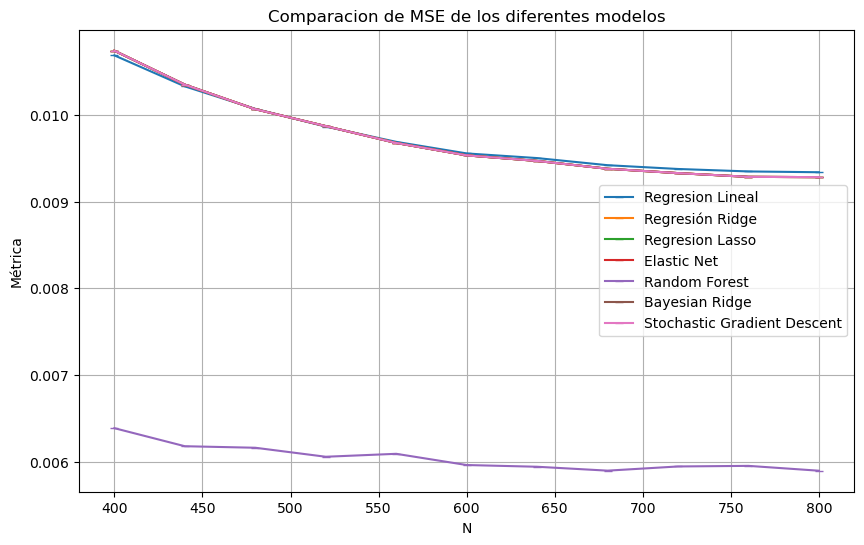

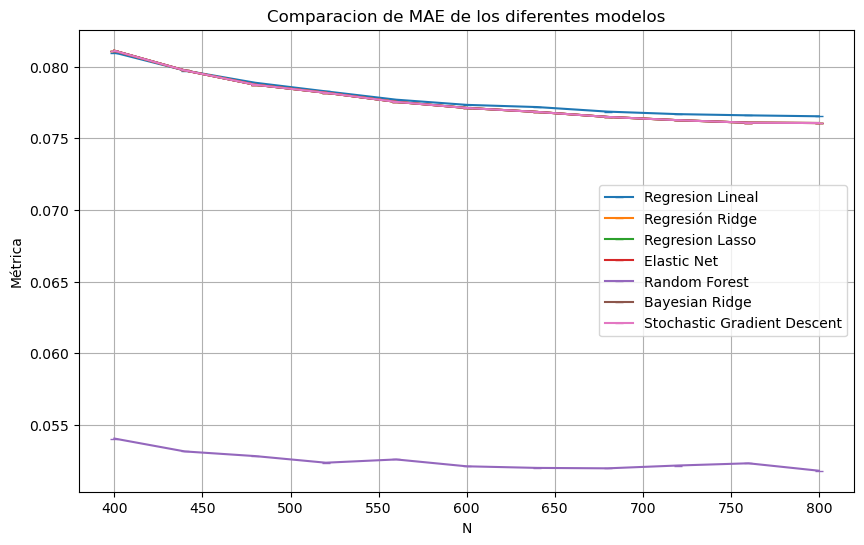

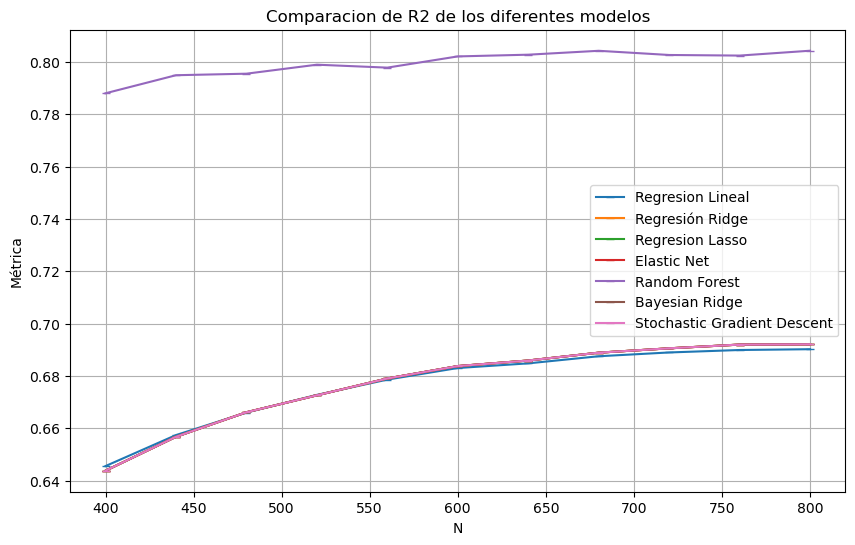

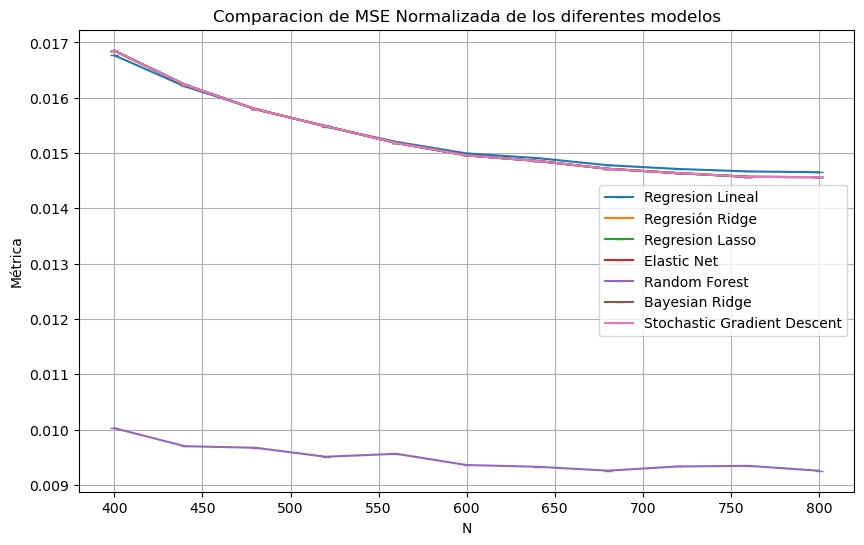

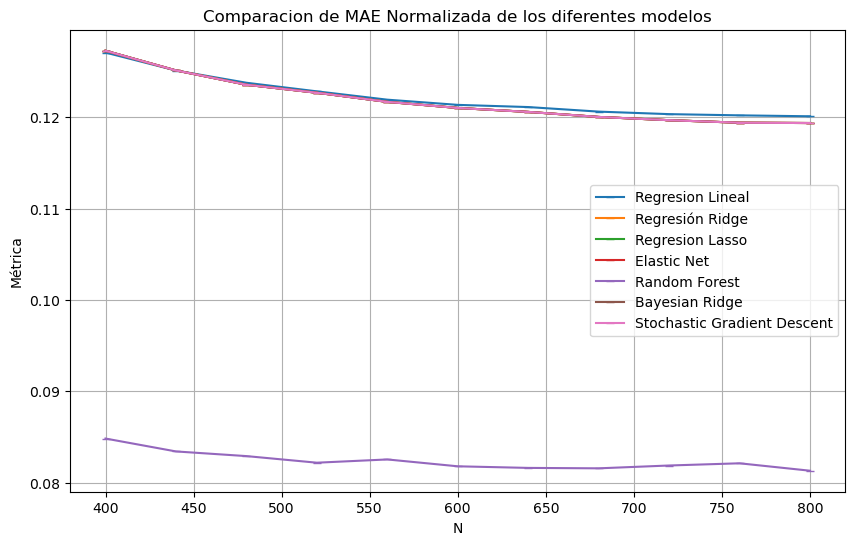

In [21]:
comparar_metricas_modelos(valores_N, mse_regresion_lineal, mse_ridge, mse_lasso, mse_elastic, mse_rf, mse_bayesian, mse_sgd, titulo='MSE')
comparar_metricas_modelos(valores_N, mae_regresion_lineal, mae_ridge, mae_lasso, mae_elastic, mae_rf, mae_bayesian, mae_sgd, titulo='MAE')
comparar_metricas_modelos(valores_N, r2_regresion_lineal, r2_ridge, r2_lasso, r2_elastic, r2_rf, r2_bayesian, r2_sgd, titulo='R2')
comparar_metricas_modelos(valores_N, mse_n_regresion_lineal, mse_n_ridge, mse_n_lasso, mse_n_elastic, mse_n_rf, mse_n_bayesian, mse_n_sgd, titulo='MSE Normalizada')
comparar_metricas_modelos(valores_N, mae_n_regresion_lineal, mae_n_ridge, mae_n_lasso, mae_n_elastic, mae_n_rf, mae_n_bayesian, mae_n_sgd, titulo='MAE Normalizada')




### 1.2.- Entrenamiento conociendo si la particula es kaon/pion, por prediccion

Como hemos obtenido buenos resultados en la clasificación de eventos tanto con redes neuronales como con la clasificación a partir de modelos tradicionales de machine learning podemos probar otra entrada para los modelos indicandole el tipo de particula de la que se trata. Para ello, tomaremos de nuevo los datos de entrenamiento (X) para que prediga los valores por regresión.

In [38]:
### Montaje de los datos

def filtrado_datos_energia_particula(df_train, N):
    X_train, etiqueta_particula_train, trueE_train = filtrado_datos_energia(df_train, N)    
    X_train = np.column_stack((etiqueta_particula_train, X_train[:, 1:]))
    return X_train, trueE_train

def metricas_entrenamiento_valores_N_particula(modelo_base, df_train, df_valid, valores_N):
    mse_modelo = np.array([])
    mae_modelo = np.array([])
    r2_modelo = np.array([])
    mse_normalizado_modelo = np.array([])
    mae_normalizado_modelo = np.array([])
    tiempo = np.array([])

    for N in valores_N:
        modelo = clone(modelo_base)

        X_train, trueE_train = filtrado_datos_energia_particula(df_train, N)
    

        X_valid, trueE_valid = filtrado_datos_energia_particula(df_valid, N)
        
        inicio_entrenamiento = time.time()
        print('Inicio de entrenamiento con', N, 'hits por evento')
        mse, mae, r2, mse_normalizado, mae_normalizado = train_metrics(modelo, X_train, trueE_train, X_valid, trueE_valid)
        fin_entrenamiento = time.time()
        print('La duracion del entrenamiento con', N, 'hits por evento es de:', fin_entrenamiento-inicio_entrenamiento)
        
        mse_modelo = np.append(mse_modelo, mse)
        mae_modelo = np.append(mae_modelo, mae)

        r2_modelo = np.append(r2_modelo, r2)

        mse_normalizado_modelo = np.append(mse_normalizado_modelo, mse_normalizado)
        mae_normalizado_modelo = np.append(mae_normalizado_modelo, mae_normalizado)

        tiempo = np.append(tiempo, fin_entrenamiento-inicio_entrenamiento)

    return mse_modelo, mae_modelo, r2_modelo, mse_normalizado_modelo,mae_normalizado_modelo, tiempo


Ahora probaremos los dos modelos anteriores que mejores resultados hayan dado

#### Regresion lineal

In [18]:
model_linear_regresion = LinearRegression(fit_intercept=True, copy_X=True, positive=True)
mse_regresion_lineal_particula, mae_regresion_lineal_particula, r2_regresion_lineal_particula, mse_n_regresion_lineal_particula, mae_n_regresion_lineal_particula, tiempo_rl_particula  = metricas_entrenamiento_valores_N_particula(model_linear_regresion, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento
La duracion del entrenamiento con 400 hits por evento es de: 56.88298416137695
Inicio de entrenamiento con 440 hits por evento
La duracion del entrenamiento con 440 hits por evento es de: 73.55522441864014
Inicio de entrenamiento con 480 hits por evento
La duracion del entrenamiento con 480 hits por evento es de: 82.7648515701294
Inicio de entrenamiento con 520 hits por evento
La duracion del entrenamiento con 520 hits por evento es de: 93.29303908348083
Inicio de entrenamiento con 560 hits por evento
La duracion del entrenamiento con 560 hits por evento es de: 107.72260880470276
Inicio de entrenamiento con 600 hits por evento
La duracion del entrenamiento con 600 hits por evento es de: 122.88580632209778
Inicio de entrenamiento con 640 hits por evento
La duracion del entrenamiento con 640 hits por evento es de: 140.07564568519592
Inicio de entrenamiento con 680 hits por evento
La duracion del entrenamiento con 680 hits por evento es de: 

#### Regresion Ridge

In [19]:
model_ridge = Ridge(alpha=1.5, fit_intercept=True, copy_X=False, solver='sag', positive=False)
mse_ridge_particula, mae_ridge_particula, r2_ridge_particula, mse_n_ridge_particula, mae_n_ridge_particula, tiempo_ridge_particula  = metricas_entrenamiento_valores_N_particula(model_ridge, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 419.4238896369934
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 482.1117925643921
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 498.3204083442688
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 534.8292548656464
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 567.8758912086487
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 662.9697704315186
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 666.5099573135376
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 722.9087865352631
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 929.9896018505096
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 1112.0432105064392
Inicio de entrenamiento con 800 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 800 hits por evento es de: 993.4595777988434


#### Regresion Lasso

In [20]:
model_lasso = Lasso(alpha=1.5, fit_intercept=False, max_iter=1500, warm_start=True, positive=False, selection='cyclic')
mse_lasso_particula, mae_lasso_particula, r2_lasso_particula, mse_n_lasso_particula, mae_n_lasso_particula, tiempo_lasso_particula  = metricas_entrenamiento_valores_N_particula(model_lasso, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento
La duracion del entrenamiento con 400 hits por evento es de: 9.629735708236694
Inicio de entrenamiento con 440 hits por evento
La duracion del entrenamiento con 440 hits por evento es de: 10.469249248504639
Inicio de entrenamiento con 480 hits por evento
La duracion del entrenamiento con 480 hits por evento es de: 11.511435985565186
Inicio de entrenamiento con 520 hits por evento
La duracion del entrenamiento con 520 hits por evento es de: 11.845070600509644
Inicio de entrenamiento con 560 hits por evento
La duracion del entrenamiento con 560 hits por evento es de: 12.659979343414307
Inicio de entrenamiento con 600 hits por evento
La duracion del entrenamiento con 600 hits por evento es de: 13.778363704681396
Inicio de entrenamiento con 640 hits por evento
La duracion del entrenamiento con 640 hits por evento es de: 14.716546773910522
Inicio de entrenamiento con 680 hits por evento
La duracion del entrenamiento con 680 hits por evento es 

#### Elastic Net

In [21]:
model_elastic_net = ElasticNet(alpha=0.5, fit_intercept=True, max_iter=500, warm_start=False, positive=False, selection='cyclic')
mse_elastic_particula, mae_elastic_particula, r2_elastic_particula, mse_n_elastic_particula, mae_n_elastic_particula, tiempo_elastic_particula  = metricas_entrenamiento_valores_N_particula(model_ridge, df_train, df_valid, valores_N)


Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 497.65524911880493
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 466.27926540374756
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 505.95519852638245
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 547.6329135894775
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 597.4072234630585
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 630.5285432338715
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 672.6241917610168
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 811.5525064468384
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 957.6452248096466
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 1036.523847103119
Inicio de entrenamiento con 800 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 800 hits por evento es de: 1059.2691020965576


#### Random Forest

In [22]:
model_RF = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_split=2, min_samples_leaf=2, max_features='sqrt')
mse_rf_particula, mae_rf_particula, r2_rf_particula, mse_n_rf_particula, mae_n_rf_particula, tiempo_rf_particula  = metricas_entrenamiento_valores_N_particula(model_RF, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento
La duracion del entrenamiento con 400 hits por evento es de: 193.35699892044067
Inicio de entrenamiento con 440 hits por evento
La duracion del entrenamiento con 440 hits por evento es de: 187.25770211219788
Inicio de entrenamiento con 480 hits por evento
La duracion del entrenamiento con 480 hits por evento es de: 187.8313946723938
Inicio de entrenamiento con 520 hits por evento
La duracion del entrenamiento con 520 hits por evento es de: 188.28789043426514
Inicio de entrenamiento con 560 hits por evento
La duracion del entrenamiento con 560 hits por evento es de: 192.0637185573578
Inicio de entrenamiento con 600 hits por evento
La duracion del entrenamiento con 600 hits por evento es de: 192.7224018573761
Inicio de entrenamiento con 640 hits por evento
La duracion del entrenamiento con 640 hits por evento es de: 196.21883916854858
Inicio de entrenamiento con 680 hits por evento
La duracion del entrenamiento con 680 hits por evento es de

#### Bayesian Ridge

In [23]:
model_bayesian_ridge = BayesianRidge(compute_score=True, fit_intercept=True, max_iter=300)
mse_bayesian_particula, mae_bayesian_particula, r2_bayesian_particula, mse_n_bayesian_particula, mae_n_bayesian_particula, tiempo_bayesian_particula  = metricas_entrenamiento_valores_N_particula(model_ridge, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 515.4627916812897
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 487.255695104599
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 509.65399718284607
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 560.7095487117767
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 555.6278417110443
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 595.7438950538635
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 633.4977674484253
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 669.4871418476105
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 713.6119906902313
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 748.8519196510315
Inicio de entrenamiento con 800 hits por evento
La duracion del entrenamiento con 800 hits por evento es de: 788.018577337265


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Stochastic Gradiente Descent for Regresion

In [24]:
model_SGD = SGDRegressor(penalty='elasticnet', fit_intercept=False, max_iter=1200, learning_rate='invscaling', warm_start=True)
mse_sgd_particula, mae_sgd_particula, r2_sgd_particula, mse_n_sgd_particula, mae_n_sgd_particula, tiempo_sgd_particula  = metricas_entrenamiento_valores_N_particula(model_ridge, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 400 hits por evento es de: 395.26973390579224
Inicio de entrenamiento con 440 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 440 hits por evento es de: 441.6145853996277
Inicio de entrenamiento con 480 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 480 hits por evento es de: 480.83218240737915
Inicio de entrenamiento con 520 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 520 hits por evento es de: 511.1884677410126
Inicio de entrenamiento con 560 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 560 hits por evento es de: 555.2000052928925
Inicio de entrenamiento con 600 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 600 hits por evento es de: 593.2150182723999
Inicio de entrenamiento con 640 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 640 hits por evento es de: 629.1608023643494
Inicio de entrenamiento con 680 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 680 hits por evento es de: 667.529983997345
Inicio de entrenamiento con 720 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 720 hits por evento es de: 701.93878698349
Inicio de entrenamiento con 760 hits por evento


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


La duracion del entrenamiento con 760 hits por evento es de: 756.8260428905487
Inicio de entrenamiento con 800 hits por evento
La duracion del entrenamiento con 800 hits por evento es de: 779.0206718444824


C:\Users\ruben.morillas\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


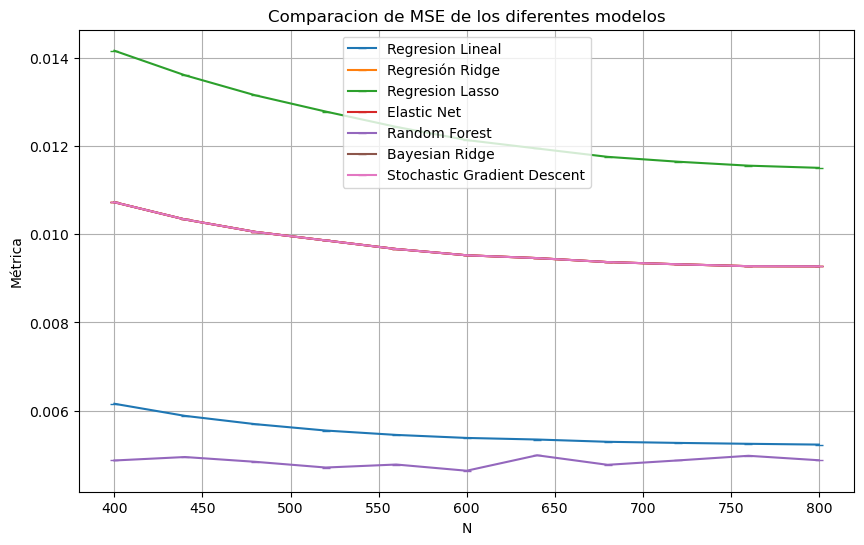

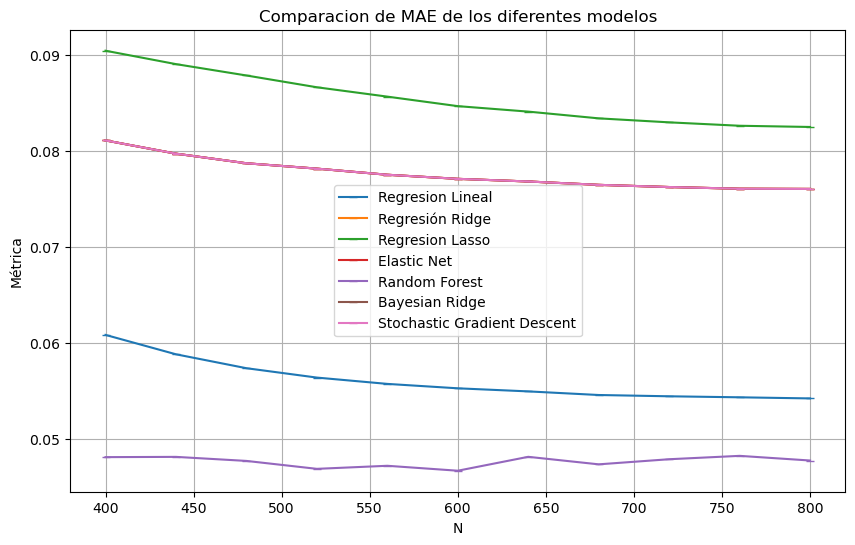

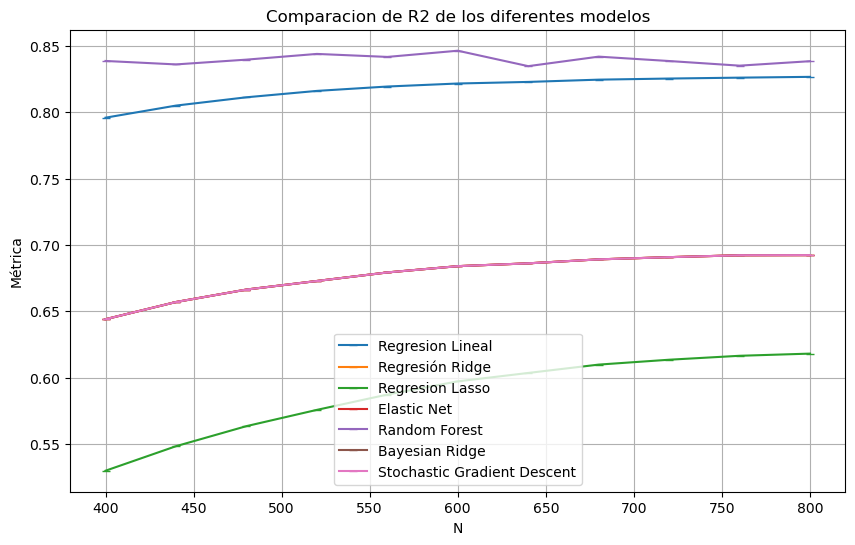

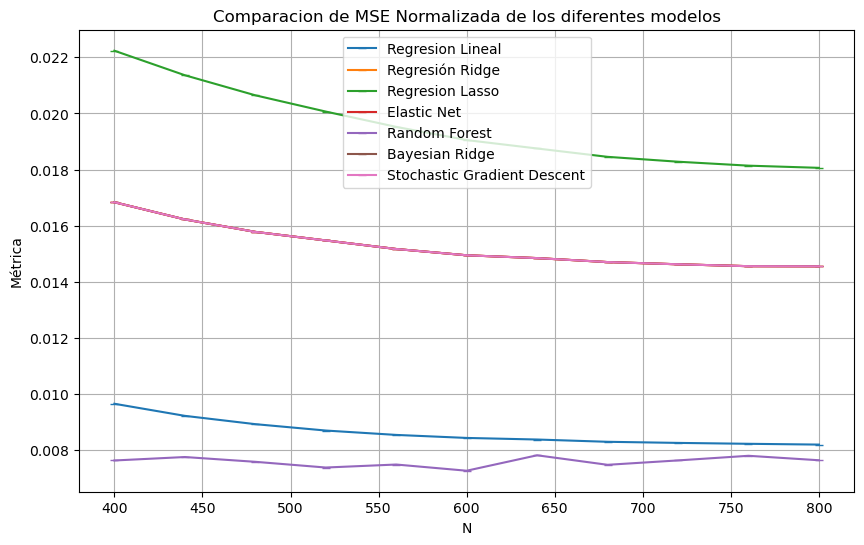

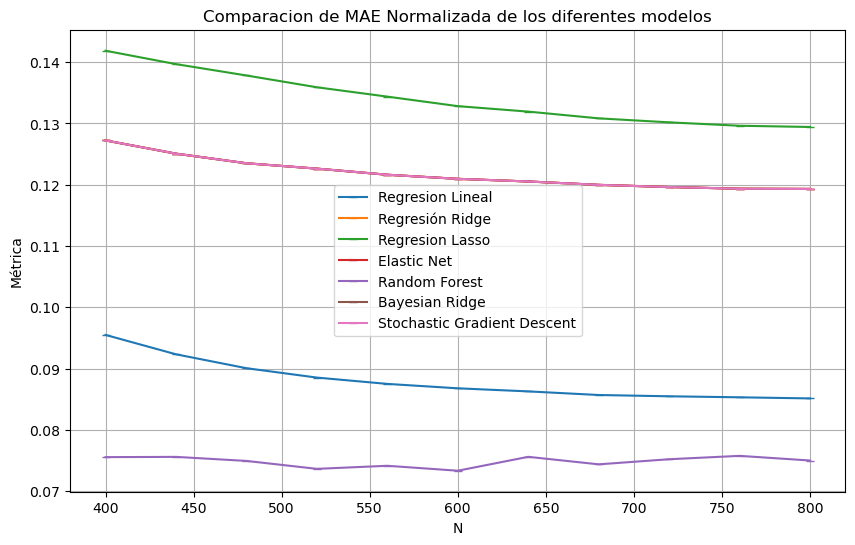

In [25]:
comparar_metricas_modelos(valores_N, mse_regresion_lineal_particula, mse_ridge_particula, mse_lasso_particula, mse_elastic_particula, mse_rf_particula, mse_bayesian_particula, mse_sgd_particula, titulo='MSE')
comparar_metricas_modelos(valores_N, mae_regresion_lineal_particula, mae_ridge_particula, mae_lasso_particula, mae_elastic_particula, mae_rf_particula, mae_bayesian_particula, mae_sgd_particula, titulo='MAE')
comparar_metricas_modelos(valores_N, r2_regresion_lineal_particula, r2_ridge_particula, r2_lasso_particula, r2_elastic_particula, r2_rf_particula, r2_bayesian_particula, r2_sgd_particula, titulo='R2')
comparar_metricas_modelos(valores_N, mse_n_regresion_lineal_particula, mse_n_ridge_particula, mse_n_lasso_particula, mse_n_elastic_particula, mse_n_rf_particula, mse_n_bayesian_particula, mse_n_sgd_particula, titulo='MSE Normalizada')
comparar_metricas_modelos(valores_N, mae_n_regresion_lineal_particula, mae_n_ridge_particula, mae_n_lasso_particula, mae_n_elastic_particula, mae_n_rf_particula, mae_n_bayesian_particula, mae_n_sgd_particula, titulo='MAE Normalizada')

### Entrenamos los dos mejores modelos y compramos los resultados

In [43]:
model_RF = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_split=2, min_samples_leaf=2, max_features='sqrt')

In [44]:
## Entrenamos Random Forest para los datos que no indican el tipo de partícula
mse_rf, mae_rf, r2_rf, mse_n_rf, mae_n_rf, tiempo_rf  = metricas_entrenamiento_valores_N(model_RF, df_train, df_valid, valores_N)


Inicio de entrenamiento con 400 hits por evento
La duracion del entrenamiento con 400 hits por evento es de: 163.86226677894592
Inicio de entrenamiento con 440 hits por evento
La duracion del entrenamiento con 440 hits por evento es de: 166.0460479259491
Inicio de entrenamiento con 480 hits por evento
La duracion del entrenamiento con 480 hits por evento es de: 170.0944104194641
Inicio de entrenamiento con 520 hits por evento
La duracion del entrenamiento con 520 hits por evento es de: 169.02683544158936
Inicio de entrenamiento con 560 hits por evento
La duracion del entrenamiento con 560 hits por evento es de: 165.53543090820312
Inicio de entrenamiento con 600 hits por evento
La duracion del entrenamiento con 600 hits por evento es de: 164.53868651390076
Inicio de entrenamiento con 640 hits por evento
La duracion del entrenamiento con 640 hits por evento es de: 161.71761536598206
Inicio de entrenamiento con 680 hits por evento
La duracion del entrenamiento con 680 hits por evento es d

In [45]:
model_RF = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_split=2, min_samples_leaf=2, max_features='sqrt')
## Entrenamos Random Forest para los datos que se le indica el tipo de particula
mse_rf_particula, mae_rf_particula, r2_rf_particula, mse_n_rf_particula, mae_n_rf_particula, tiempo_rf_particula  = metricas_entrenamiento_valores_N_particula(model_RF, df_train, df_valid, valores_N)

Inicio de entrenamiento con 400 hits por evento
La duracion del entrenamiento con 400 hits por evento es de: 159.44954419136047
Inicio de entrenamiento con 440 hits por evento
La duracion del entrenamiento con 440 hits por evento es de: 158.40015840530396
Inicio de entrenamiento con 480 hits por evento
La duracion del entrenamiento con 480 hits por evento es de: 174.2829327583313
Inicio de entrenamiento con 520 hits por evento
La duracion del entrenamiento con 520 hits por evento es de: 185.69221091270447
Inicio de entrenamiento con 560 hits por evento
La duracion del entrenamiento con 560 hits por evento es de: 185.6510043144226
Inicio de entrenamiento con 600 hits por evento
La duracion del entrenamiento con 600 hits por evento es de: 184.70425367355347
Inicio de entrenamiento con 640 hits por evento
La duracion del entrenamiento con 640 hits por evento es de: 155.17342042922974
Inicio de entrenamiento con 680 hits por evento
La duracion del entrenamiento con 680 hits por evento es d

In [46]:
def comparar_dos_modelos(valores_N, metrica1, metrica2, titulo):
    plt.figure(figsize=(10, 6))

    # Graficar las métricas en la misma gráfica
    plt.plot(valores_N, metrica1, label='RF', marker='_')
    plt.plot(valores_N, metrica2, label='RF particula', marker='_')

    plt.title('Comparacion de '+titulo+ ' de los dos mejores modelos')
    plt.xlabel('N')
    plt.ylabel('Métrica')
    plt.legend()
    plt.grid(True)

    plt.show()

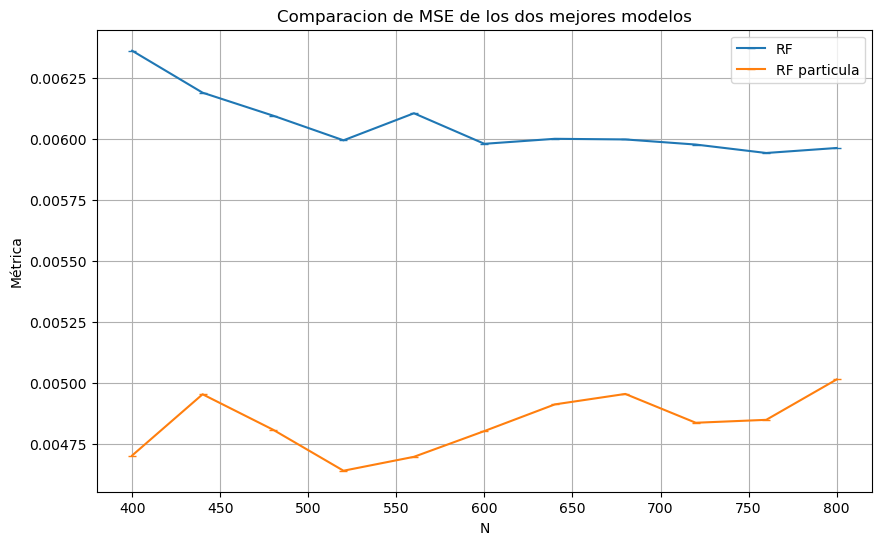

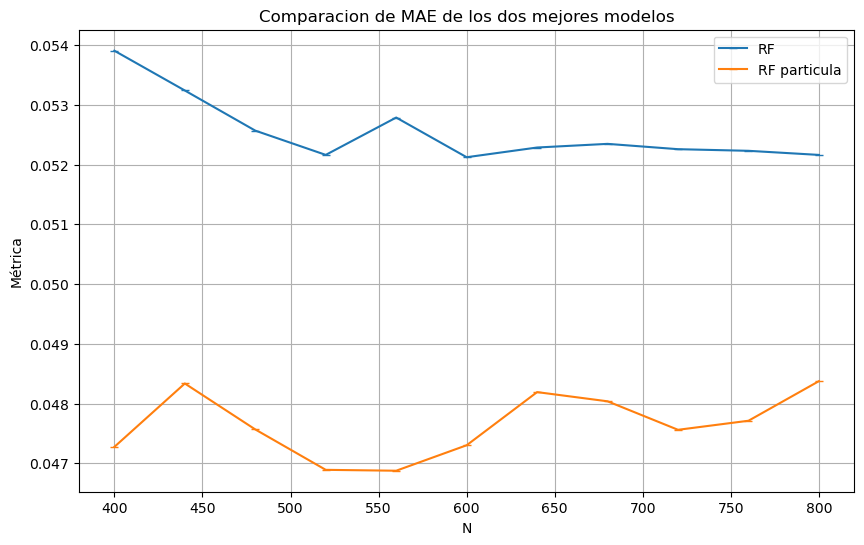

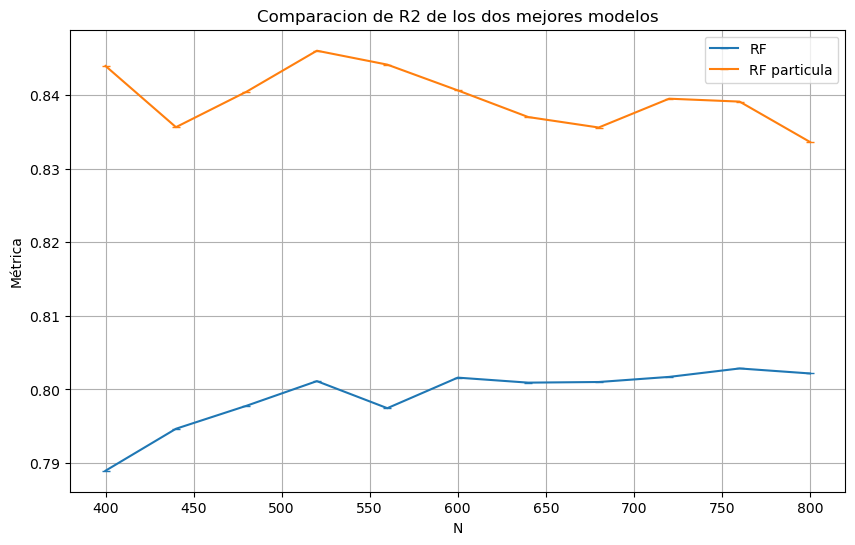

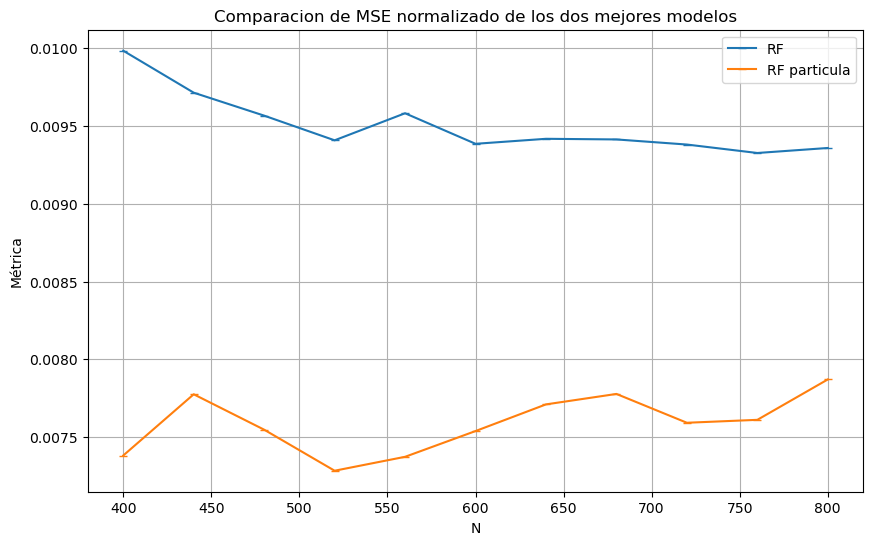

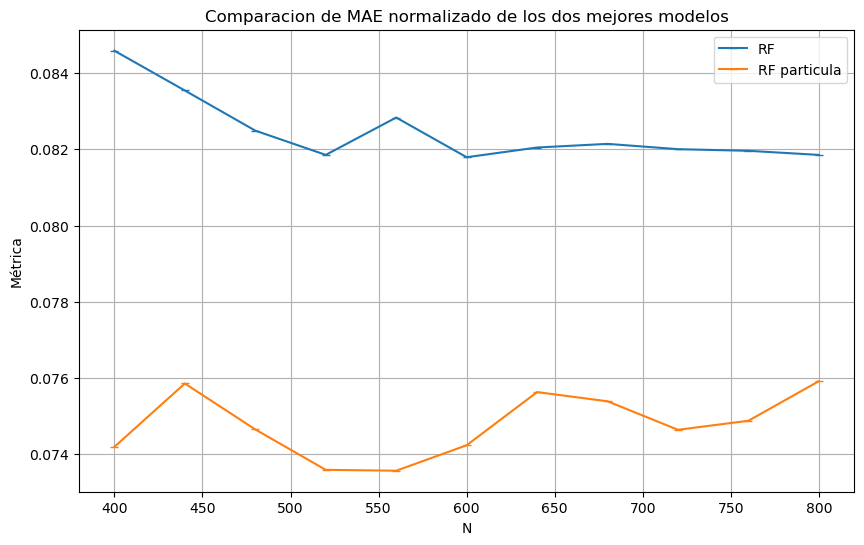

In [47]:
comparar_dos_modelos(valores_N, mse_rf, mse_rf_particula, titulo='MSE')
comparar_dos_modelos(valores_N, mae_rf, mae_rf_particula, titulo='MAE')
comparar_dos_modelos(valores_N, r2_rf, r2_rf_particula, titulo='R2')
comparar_dos_modelos(valores_N, mse_n_rf, mse_n_rf_particula, titulo='MSE normalizado')
comparar_dos_modelos(valores_N, mae_n_rf, mae_n_rf_particula, titulo='MAE normalizado')

In [56]:
print('MSE')
print(min(mae_n_rf_particula))
min_index = np.argmin(mae_n_rf_particula)
print(valores_N[min_index])

print(max(mae_n_rf_particula))
max_index = np.argmax(mae_n_rf_particula)
print(valores_N[max_index])

print(np.mean(mae_n_rf_particula))
print(np.std(mae_n_rf_particula))


MSE
0.0735601902735908
560
0.07591270351102707
800
0.07477116310846164
0.0008051555712239268


### Graficas Errores

In [ ]:
model_RF = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_split=2, min_samples_leaf=2, max_features='sqrt')
N=800
X_train, y_train = filtrado_datos_energia_particula(df_train, N)
X_valid, y_valid = filtrado_datos_energia_particula(df_valid, N)

model_RF.fit(X_train, y_train)

y_pred = model_RF.predict(X_valid)


In [ ]:
residuales = y_valid - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuales)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.title('Errores Residuales')
plt.show()

### Resultados de test para el mejor modelo

In [57]:
model_RF = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_split=2, min_samples_leaf=2, max_features='sqrt')
df_union = pd.concat([df_train, df_valid], ignore_index=True)
N=800
X, trueE = filtrado_datos_energia_particula(df_union, N)




In [58]:
file_test = 'df_test.csv'
path_test = os.path.join(path_actual,subdirectorio, file_test)
df_test = pd.read_csv(path_test, index_col=None)

X_test, trueE_test = filtrado_datos_energia_particula(df_test, N)



In [59]:
model_RF.fit(X, trueE)

y_predict_test = model_RF.predict(X_test)

mae_test, mse_test, r2_test, mae_normalizado_test, mse_normalizado_test = scores_errors(trueE_test, y_predict_test)

print('Test')
print('MAE test:', mae_test)
print('MSE test:', mse_test)
print('R2 test:', r2_test)
print('MAE normalizado:', mae_normalizado_test)
print('MSE normalizado:',mse_normalizado_test)

MAE test: 0.004592886406777537
MSE test: 0.046439600162197024
R2 test: 0.848890466000835
MAE normalizado: 0.007212481225221754
MSE normalizado: 0.0729268513548227


In [60]:
X_train, trueE_train = filtrado_datos_energia_particula(df_train, N)
X_valid, trueE_valid = filtrado_datos_energia_particula(df_valid, N)

model_RF = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_split=2, min_samples_leaf=2, max_features='sqrt')

model_RF.fit(X_train, trueE_train)

y_predict_train = model_RF.predict(X_train)
mae_train, mse_train, r2_train, mae_normalizado_train, mse_normalizado_train = scores_errors(trueE_train, y_predict_train)

print('Train')
print('MAE Train:', mae_train)
print('MSE Train:', mse_train)
print('R2 Train:', r2_train)
print('MAE normalizado:', mae_normalizado_train)
print('MSE normalizado:',mse_normalizado_train)

Train
MAE Train: 0.0010687310626928267
MSE Train: 0.021647883692406823
R2 Train: 0.9645696888567135
MAE normalizado: 0.001676743354005549
MSE normalizado: 0.03396359138104415


In [61]:
y_predict_valid = model_RF.predict(X_valid)
mae_valid, mse_valid, r2_valid, mae_normalizado_valid, mse_normalizado_valid = scores_errors(trueE_valid, y_predict_valid)
print('valid')
print('MAE valid:', mae_valid)
print('MSE valid:', mse_valid)
print('R2 valid:', r2_valid)
print('MAE normalizado:', mae_normalizado_valid)
print('MSE normalizado:',mse_normalizado_valid)

valid
MAE valid: 0.004782677503797111
MSE valid: 0.04726161144169984
R2 valid: 0.8413507590705226
MAE normalizado: 0.007505217762966496
MSE normalizado: 0.0741652945273965
